# Sleep Disorder Prediction

This project uses machine learning to predict **sleep disorders** (such as **Insomnia** and **Sleep Apnea**) based on a person's lifestyle and medical information. It includes data preprocessing, exploratory analysis, and predictive modeling.

---

### Project Objective
To build a classification model that predicts the **type of sleep disorder** based on variables like age, BMI, stress level, physical activity, sleep duration, and vital signs.

---

### Dataset Summary

The dataset includes **400 records** and **13 features**:
- **Demographics**: Gender, Age, Occupation
- **Lifestyle**: Sleep Duration, Sleep Quality, Physical Activity, Stress Level, Daily Steps
- **Health Metrics**: BMI Category, Blood Pressure, Heart Rate
- **Target**: Sleep Disorder (None, Insomnia, Sleep Apnea)

📁 Dataset: `Sleep_health_and_lifestyle_dataset.csv`

---

### Exploratory Data Analysis (EDA)

- Visualized distributions of age, stress, and BMI
- Analyzed the effect of gender, occupation, and BMI on sleep disorders
- Split blood pressure into systolic and diastolic components
- Encoded categorical features for model compatibility

---

### Machine Learning Models

#### *1. Decision Tree Classifier*
- Accuracy: ~87%
- Easy to interpret, but slightly prone to overfitting

#### *2. Random Forest Classifier*
- Accuracy: ~89%
- Best performance with strong generalization

---

### Evaluation Metrics

- **Confusion Matrix**
- **Classification Report** (Precision, Recall, F1 Score)
- **Actual vs Predicted KDE Plots**

---

### Technologies Used

- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn

---

### Key Insights

- **Gender**: Males more prone to Insomnia; females to Sleep Apnea
- **Occupation**: Nurses and Salespeople showed higher sleep disorder rates
- **BMI**: Overweight and obese individuals are at greater risk

---

### How to Run

1. Clone this repository  
2. Install dependencies  
   ```bash
   pip install -r requirements.txt


In [80]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib

In [9]:
#Loading the Database
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Data Processing Part 1

In [10]:

#Checking for missing values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [12]:
#Replacing the null value with 'None' in the column 'Sleep Disorder'
df['Sleep Disorder'].fillna('None', inplace=True)

C:\Users\Sanskar\AppData\Local\Temp\ipykernel_2592\3932437390.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('None', inplace=True)


In [13]:
#Checking the number of unique values in each column
print("Unique values in each column are:")
for col in df.columns:
    print(col, df[col].nunique())

Unique values in each column are:
Person ID 374
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


### Spliting the blood pressure into two columns

In [ ]:

df['systolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['diastolic_bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])
#Droping the blood pressure column
df.drop('Blood Pressure', axis=1, inplace=True)

In [ ]:
#Replacing normal weight with normal in BMI column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [26]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


### Check Unique Values From Categorical Column

In [27]:
print(df.Occupation.unique())
print('\n')
print(df['BMI Category'].unique())
print('\n')
print(df['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


['Overweight' 'Normal' 'Obese']


['None' 'Sleep Apnea' 'Insomnia']


### EXPLORATIVE DATA ANALYSIS
The EDA is divided into two phases:

Phase 1:  Understanding the data by plotting its variables

Phase 2: Understanding the correlation between the variables


PHASE 1

<Axes: xlabel='Sleep Disorder', ylabel='count'>

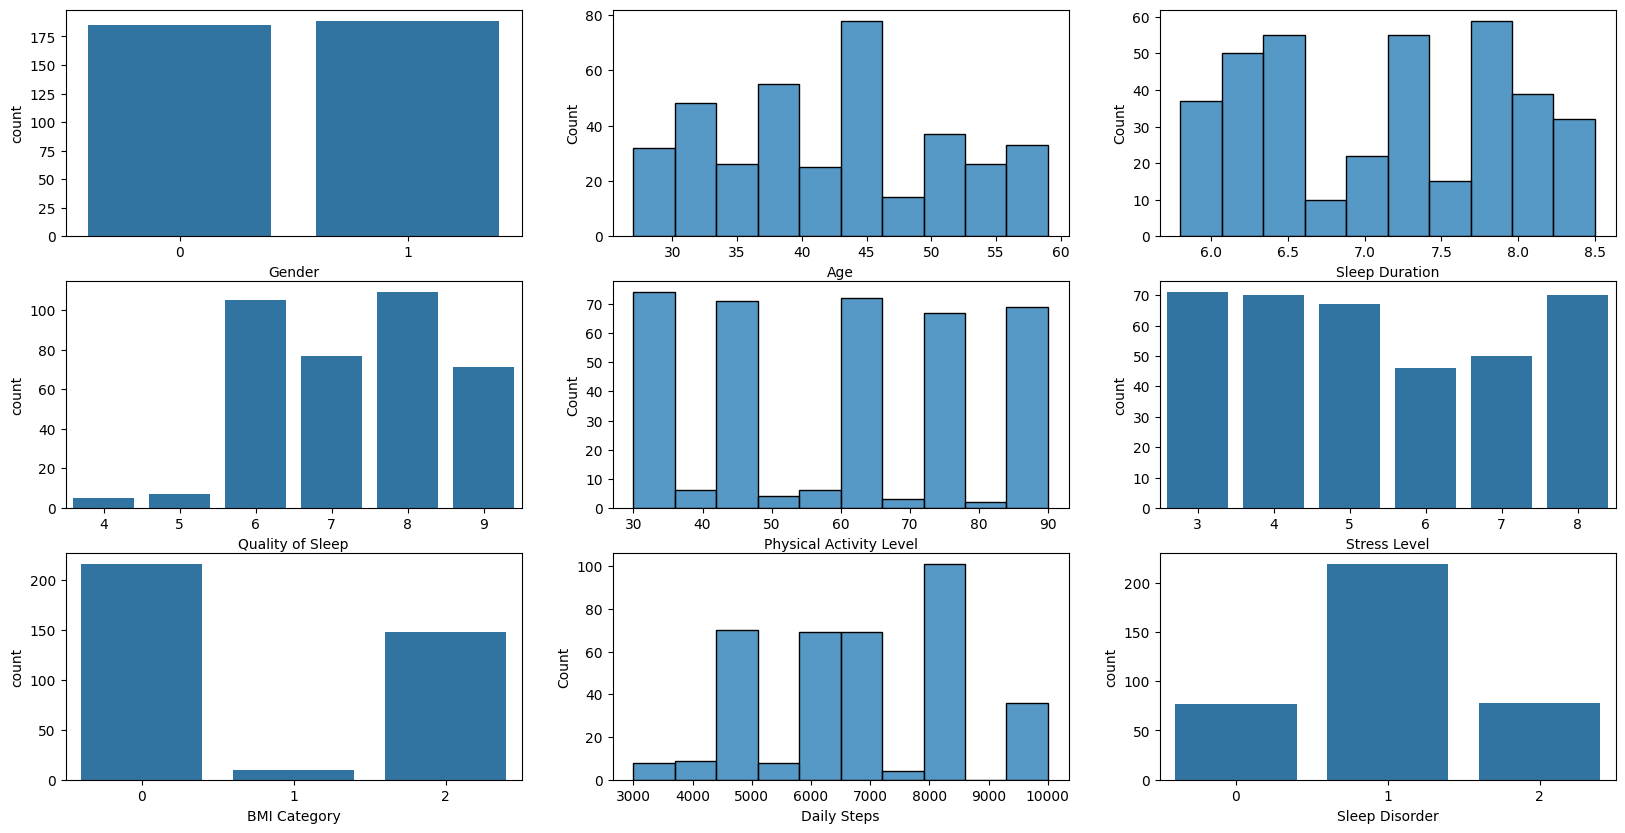

In [57]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
sns.countplot(x = 'Gender', data = df, ax = ax[0, 0])
sns.histplot(x = 'Age', data = df, ax = ax[0, 1], bins = 10)
sns.histplot(x = 'Sleep Duration', data= df, ax = ax[0, 2], bins = 10)
sns.countplot(x = 'Quality of Sleep', data = df, ax = ax[1, 0])
sns.histplot(x = 'Physical Activity Level', data = df, ax = ax[1, 1], bins = 10)
sns.countplot(x = 'Stress Level', data = df, ax = ax[1, 2])
sns.countplot(x = 'BMI Category', data = df, ax = ax [2, 0])
sns.histplot(x = 'Daily Steps', data= df, ax= ax[2, 1], bins = 10)
sns.countplot(x = 'Sleep Disorder', data = df, ax = ax[2, 2])

### EXPLORATIVE DATA ANALYSIS
PHASE 2

<Axes: xlabel='Gender', ylabel='count'>

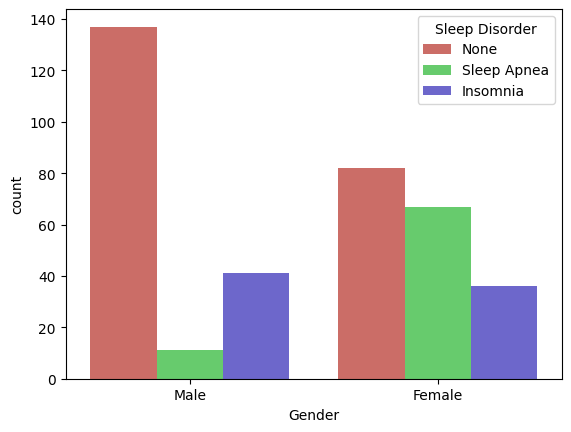

In [31]:
#Gender and Sleep Disorder

sns.countplot(x = 'Gender', data= df, palette = 'hls', hue = 'Sleep Disorder')

1) Most of the males and females are not suffering from any sleep disorder. 
2) However females tend to have more sleep disorder as compared to males. The number of females suffering from Sleep Apnea is quite high as compared to males. 
3) But in contrast to that, greater number of males are suffering from Insomia as compared to females.

### Effect of Occupation on sleep Disorder

C:\Users\Sanskar\AppData\Local\Temp\ipykernel_2592\3995903143.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

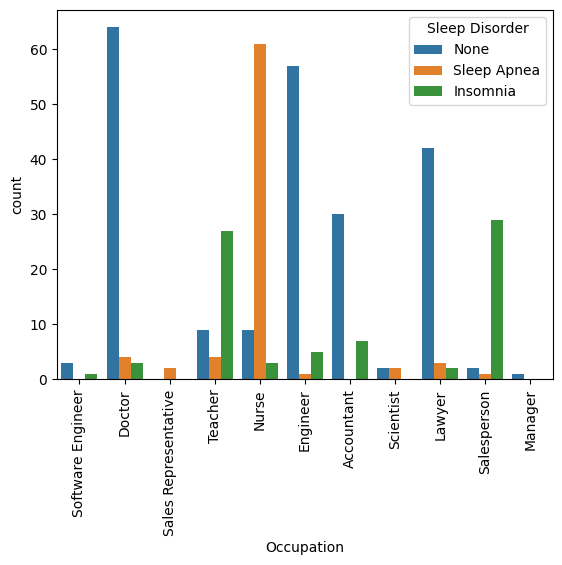

In [36]:
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

1) From the graph it is clear that the occupation has huge impact on the sleep disorder. 
2) Nurses are more subjected to have Sleep Apenea as compared to other occupations and very few of them have no sleep disorder. 
3) After nurses, the next most affected occupation is the Salesperson, which counts for the  most suffering from Insomia followed by teachers. 
4) However there are some occupations where most of the people have very few instance of Sleep Apenea and Insomia such as Engineers, Doctors, Accountants, Lawyers. 
5) The Software ENgineers and Managers are so less in number so I cannot say much about that, But the occupation Sales Representative has shown only Sleep Apenea and no Insomia or No sleep disorder. 

### BMI and Sleep Disorder

<Axes: xlabel='BMI Category', ylabel='count'>

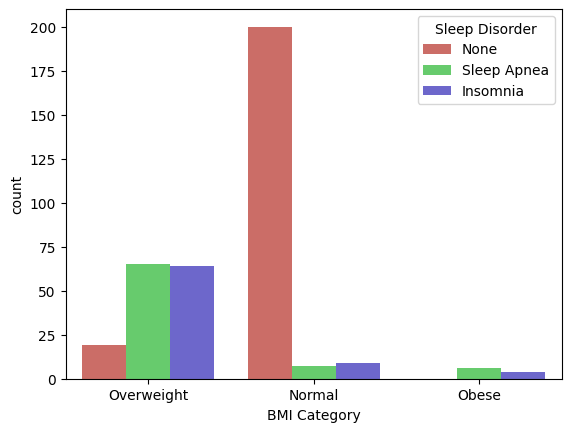

In [37]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = df, palette = 'hls')

People with normal BMI are less likely to suffer from any sleep disorder. However, this is opposite in case of Overweight and Obese people. Overweight are more likely to suffer more from sleep disordera than Obese people.

### Data Processing Part 2
Lable Encoding for categorial variables

In [39]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [40]:
vars = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for i in vars:
    label_encoder.fit(df[i].unique())
    df[i] = label_encoder.transform(df[i])
    print(i, ':', df[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


### Correlation Matrix Heatmap

<Axes: >

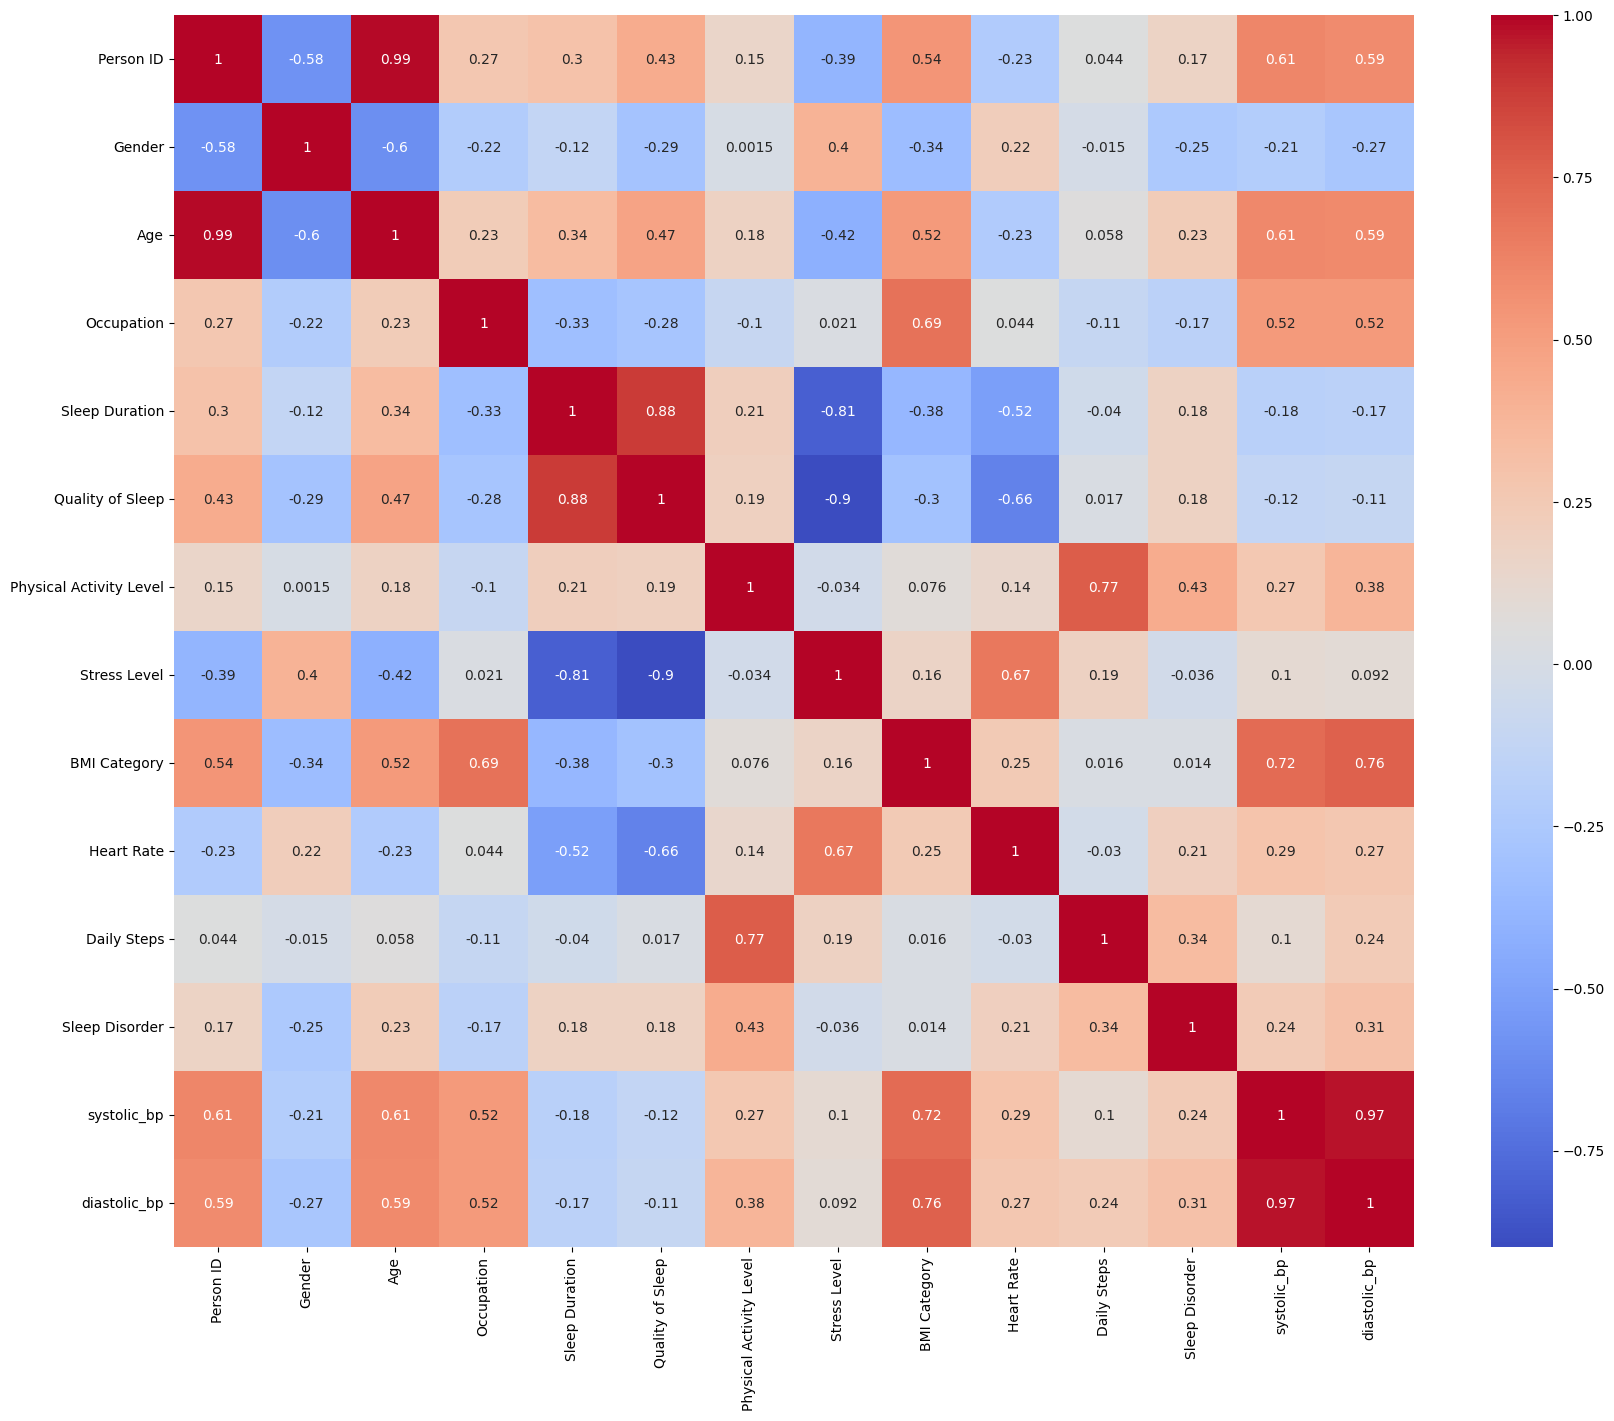

In [43]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [47]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder', axis=1), df['Sleep Disorder'], test_size=0.3, random_state=42)

**Model Building**
For predictiong the sleep disorder through classification algorithms i will use the following algorithms:
1. Decision Tree Classification
2. Random Forest Classification

In [52]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [53]:
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [54]:
#Training accuracy
print("Traning Accuracy:", dtree.score(X_train, y_train))

Traning Accuracy: 1.0


In [55]:
#Decision Tree Model Evaluation
d_pred = dtree.predict(X_test)
d_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1,
       2, 1, 0])

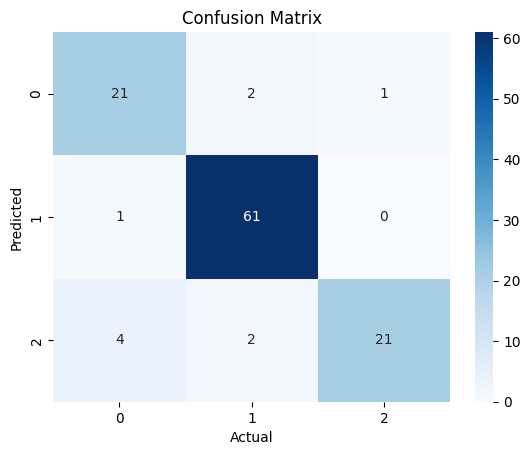

In [56]:
#using Confusion matrix heatmap to visualize the model accuracy
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

The diagonal boxes show the count of true positive results, i.e correct predictions made by the model. The off-diagonal boxes show the count of false positive results, i.e incorrect predictions made by the model.

### Distribution plot for prediction and actual values

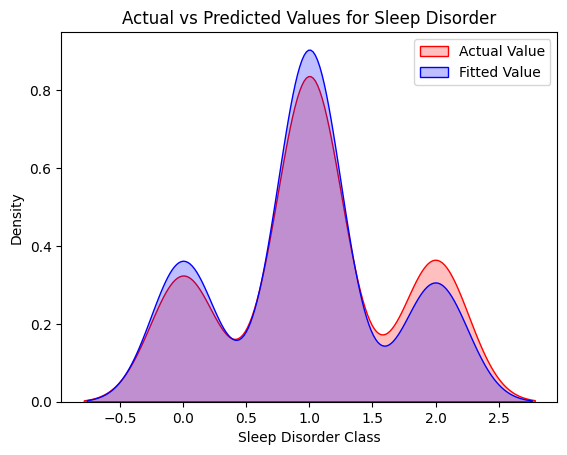

In [62]:
sns.kdeplot(y_test, color='r', label='Actual Value', fill=True)
sns.kdeplot(d_pred, color='b', label='Fitted Value', fill=True)

plt.title('Actual vs Predicted Values for Sleep Disorder')
plt.xlabel('Sleep Disorder Class')
plt.ylabel('Density')
plt.legend()
plt.show()


1. The actual values are represented with red and the predicted ones with blue. 
2. As shown in the graph, the model's prediction are able to follow the curve of actual values but the predicted values are still different from actual ones. 
3. Therefore the model is not able to predict the values accurately.

### Classification Report

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        24
           1       0.94      0.98      0.96        62
           2       0.95      0.78      0.86        27

    accuracy                           0.91       113
   macro avg       0.90      0.88      0.89       113
weighted avg       0.91      0.91      0.91       113



The model gives pretty decent results with an accuracy of 87% and an average F1 score of 0.83. The model is able to predict the sleep disorder with a good accuracy.

### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


In [73]:
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Training the model with train dataset

In [74]:
#Training accuracy
print("Training accuracy: ",rfc.score(X_train,y_train))

Training accuracy:  1.0


### Random Forest Classifier Evaluation

In [75]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1,
       2, 1, 0])

Using confusion matrix heatmap to visualize the model accuracy

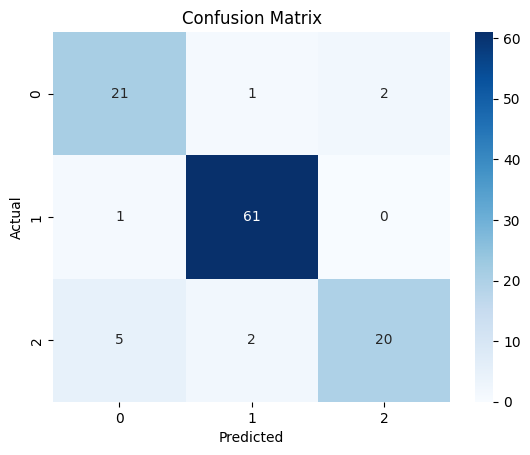

In [76]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The Random Forest Classifier model  has greater accuracy than the Decision Tree Classifier model. The diagonal boxes count for the True Positives i.e correct predictions, whereas the off-diagonal boxes show the count of false positive results, i.e incorrect predictions made by the model. Since the number of false positve value is less, it shows that the model is good at predicting the correct results.


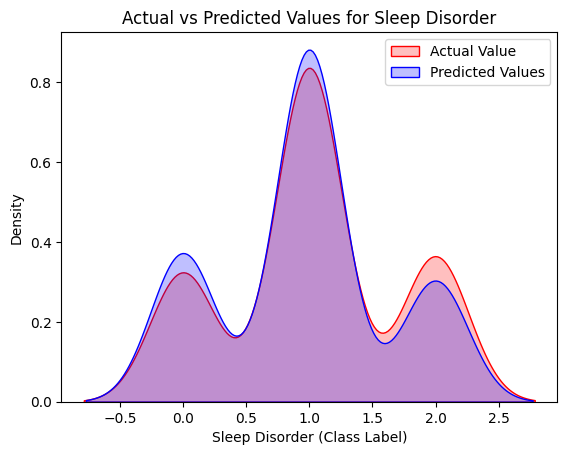

In [78]:
sns.kdeplot(y_test, label="Actual Value", color="r", fill=True)
sns.kdeplot(rfc_pred, label="Predicted Values", color="b", fill=True)

plt.title('Actual vs Predicted Values for Sleep Disorder')
plt.xlabel('Sleep Disorder (Class Label)')
plt.ylabel('Density')
plt.legend()
plt.show()

The Random forest classifier has improved accuracy as compared to the Decision Tree which is shown with the gap between the actual and predcited values which was wider incase of Descision Tree Classifier.

#### Classification Report

In [79]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.95      0.98      0.97        62
           2       0.91      0.74      0.82        27

    accuracy                           0.90       113
   macro avg       0.88      0.87      0.87       113
weighted avg       0.91      0.90      0.90       113



The Random Forest Classifier model has an accuracy of 89%  and an avergae F1 score of 0.86. From the metrics it is quite clear that the model is able to predict the sleep disorder quite effectively, with increased accuracy than Decision Tree Classifer.

## Conclusion

From the exploratory data analysis, I have concluded that the sleep orders depends upon three main factors that are gender, occupation and BMI of the patient. The males have more instance of Insomia whereas femlaes have more instances of Sleep Apnea. In addition the that people with occupation such as nurses are more prone to sleep disorders. The BMI of the patient also plays a vital role in the prediction of sleep disorders. The patients who are either Obese or overweight are more prone to sleep disorders.

Coming to the classfication models, both the models performed pretty good, however the Random Forest Classifier have excellent results with 89% accuracy.

#### Streamlit App for Sleep Disorder Prediction

In [81]:
joblib.dump(rfc, "sleep_disorder_model.pkl")

['sleep_disorder_model.pkl']